# COVID-19 India Data Analysis

This project is created as to understand the increase in confirmed COVID-19 cases in India.

In this project I have created the Racing Bar Graph for increase in confirm cases of each State in India from January,2020 to May,2020.

Various articles were reffered by me to understand Racing Bar Graph.
### Links for reference:
     1) https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41
     2) https://www.kaggle.com/caniban/bar-chart-race-with-matplotlib
     3) https://documenter.getpostman.com/view/10724784/SzYXXKmA?version=latest
     
Data used is from API: https://api.covid19india.org/raw_data.json

##### Topics covered in this Notebook are:
 - Preprocessing of Raw Data
 - Bar graph of confirmed cases in India for all states on Single Day
 - Racing Bar graph for all states from 30th January,2020 to 1st May,2020
 
Note: Data in this api is getting updated slowly so you might see differences in count.

### Import all the required libraries

In [1]:
#Requests library is for fetching data
import requests
#Pandas for traversing and structuring data
import pandas as pd
#json_normalize is used coverting JSON to Pandas Dataframe
from pandas.io.json import json_normalize 
#Matplotlib for creating visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
#Datetime as we are going to search data for each day
from datetime import date,timedelta
#Below code is used when you want to store animated video to your system
#plt.rcParams['animation.ffmpeg_path'] = 'C:/ffmpeg/bin/ffmpeg.exe'

### Creating writer for storing file to local system

In [2]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Me'), bitrate=1800)

### Getting data from API (We are using Raw Data API)  

In [3]:
raw_data=requests.get('https://api.covid19india.org/raw_data.json')
raw_data=raw_data.json()

### Performing Data manupulations

In [4]:
#Converting JSON Data to Pandas Dataframe
df_raw_data=pd.json_normalize(raw_data,"raw_data")

#Dropping currently unwanted rows from Dataframe
df_raw_data=df_raw_data.drop(['source2','source1','source3','gender','contractedfromwhichpatientsuspected','estimatedonsetdate','patientnumber','detecteddistrict','detectedcity','agebracket'],axis=1)

#Removing row with empty State value from Dataframe
df_raw_data=df_raw_data[df_raw_data['detectedstate']!=""]

#Reading first 5 rows
df_raw_data.head(5)

,backupnotes,currentstatus,dateannounced,detectedstate,nationality,notes,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,Student from Wuhan,Recovered,30/01/2020,Kerala,India,Travelled from Wuhan,KL,KL-TS-P1,14/02/2020,Imported
1,Student from Wuhan,Recovered,02/02/2020,Kerala,India,Travelled from Wuhan,KL,KL-AL-P1,14/02/2020,Imported
2,Student from Wuhan,Recovered,03/02/2020,Kerala,India,Travelled from Wuhan,KL,KL-KS-P1,14/02/2020,Imported
3,Travel history to Italy and Austria,Recovered,02/03/2020,Delhi,India,"Travelled from Austria, Italy",DL,DL-P1,15/03/2020,Imported
4,"Travel history to Dubai, Singapore contact",Recovered,02/03/2020,Telangana,India,"Travelled from Dubai to Bangalore on 20th Feb,...",TG,TS-P1,02/03/2020,Imported


### Finding out total States in Data that will be used further assigning different colors to bars

In [5]:
states_group=df_raw_data.groupby('detectedstate')
states=list(states_group.groups.keys())
print(f"We have data from {len(states)} states in India")

We have data from 32 states in India


### Creating color Dictionary and assigning color to each state

In [6]:
colors = dict(zip(
   ['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381','#aafbff', '#f7bb5f', '#eafb50','#E91010','#E96F10','#35E910','#11E910','#10E971',
    '#D198A5','#D1989E', '#90d595', '#e48381','#aafbff', '#f7bb5f', '#eafb50','#E91010','#E96F10','#35E910','#11E910','#10E971',
    '#10E7E9','#10CDE9','#1095E9','#98A9D1','#BC98D1','#CF98D1','#D198BF','#D198B4']
))

### Generating Graph for Cases registered on Single Day

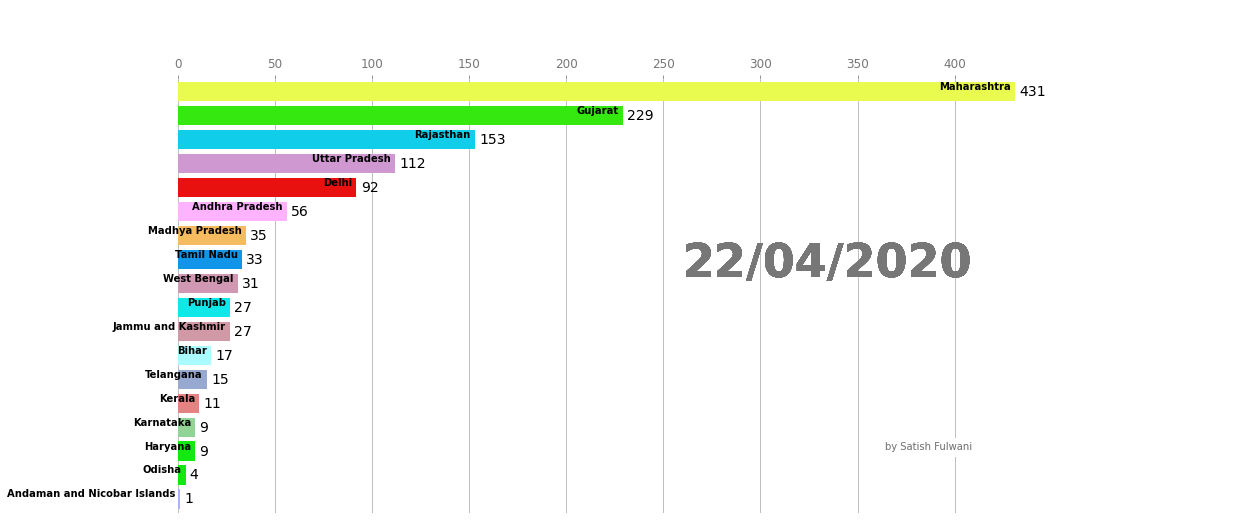

In [20]:
total_cases_dict={}
#Creating subplot for our graph
fig_single, ax_single = plt.subplots(figsize=(15, 8))
#Assigning random date and finding out results
random_date=date(2020,4,22)
#Format date before searching in dataframe as Format in data frame is dd/mm/yyyy
random_date=random_date.strftime("%d/%m/%Y")
#Getting data for the day we are searching for
df_according_date1=df_raw_data[df_raw_data['dateannounced']==(random_date)]
#Group data according to States
df_grouped=df_according_date1.groupby('detectedstate')
#Finding total cases reported in each state
for val in zip(df_grouped.groups.keys(),df_grouped.groups.values()):
        state=val[0]
        temp=len(val[1])
        try:
            total_cases_dict[state]=total_cases_dict[state]+temp
        except:
            total_cases_dict[state]=temp
total_cases_dict1 = dict(sorted(total_cases_dict.items(), key=operator.itemgetter(1)))
total_states=list(total_cases_dict1.keys())
total_count=list(total_cases_dict1.values())
ax_single.clear()
#Plotting bar data using data
ax_single.barh(total_states,total_count, color=[colors[x] for x in total_states])

#Finding small factor to subtract or add to the count to give to good look to our bar chart
try:
    dx=max(total_count)/200
except:
    dx=0
for i, (state, count) in enumerate(zip(total_states, total_count)):
    #Adding state name inside the bar so we do actual count-small factor
    ax_single.text(count-dx, i,     state,           size=10, weight=600, ha='right', va='bottom')
    #Adding count outside the bar so we do actual count-small factor
    ax_single.text(count+dx, i,     f'{count:,.0f}',  size=14, ha='left',  va='center')
    #Adding todays date to the middle of graph
    ax_single.text(1, 0.4, random_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    #Assigning label to x-axis
    ax_single.text(0, 1.06, 'Total Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax_single.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax_single.xaxis.set_ticks_position('top')
    ax_single.tick_params(axis='x', colors='#777777', labelsize=12)
    ax_single.set_yticks([])
    ax_single.margins(0, 0.01)
    ax_single.grid(which='major', axis='x', linestyle='-')
    ax_single.set_axisbelow(True)
    ax_single.text(0, 1.12, 'Confirmed Corona Virus cases in India from 30th January,2020 to 1st May,2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax_single.text(1, 0, 'by Satish Fulwani', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

### Adding all the above steps to Method which would be called by FuncAnimation class.(For more details read comments in above cell)

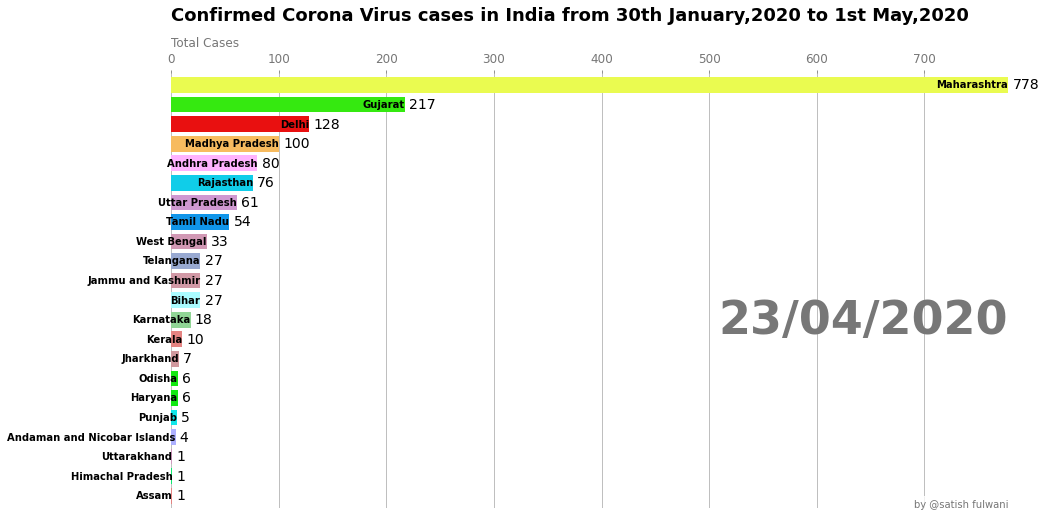

In [21]:
#Here we are using total_cases_dict dictionary for keeping track of cases registred till date in particular state
import operator
fig, ax = plt.subplots(figsize=(15, 8))
total_cases_dict={}
def draw_graph(todays_date):
    #Converting date to specified form
    todays_date=todays_date.strftime("%d/%m/%Y")
    df_according_date=df_raw_data[df_raw_data['dateannounced']==(todays_date)]
    df_grouped=df_according_date.groupby('detectedstate')
    #Below loop check if state is present in total_cases_dict if state is present so updates the count, if state is not present then state is added to dict with count
    for val in zip(df_grouped.groups.keys(),df_grouped.groups.values()):
        state=val[0]
        temp=len(val[1])
        try:
            total_cases_dict[state]=total_cases_dict[state]+temp
        except:
            total_cases_dict[state]=temp
    total_cases_dict1 = dict(sorted(total_cases_dict.items(), key=operator.itemgetter(1)))
    total_states=list(total_cases_dict1.keys())
    total_count=list(total_cases_dict1.values())
    ax.clear()
    ax.barh(total_states,total_count,color=[colors[x] for x in total_states])
    try:
        dx=max(total_count)/200
    except:
        dx=0
    for i, (state, count) in enumerate(zip(total_states, total_count)):
        ax.text(count, i,     state,           size=10, weight=600, ha='right', va='center')
        ax.text(count+dx, i,     f'{count:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, todays_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Total Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Confirmed Corona Virus cases in India from 30th January,2020 to 1st May,2020',
            transform=ax.transAxes, size=18, weight=600, ha='left')
    ax.text(1, 0, 'by @satish fulwani', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

random_date=date(2020,4,23)
draw_graph(random_date)

### We would be using Animations FuncAnimation class, which helps us to store live animations
For more details read: https://www.geeksforgeeks.org/matplotlib-animation-funcanimation-class-in-python/

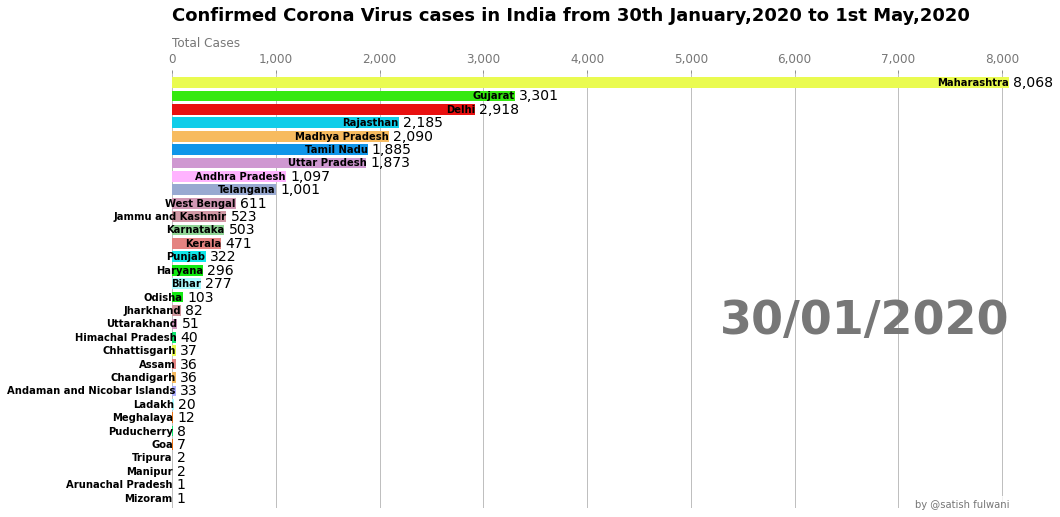

In [22]:
#Defing subplot
fig, ax = plt.subplots(figsize=(15, 8))
#Dictionary for storing data of confirmed cases till date
total_cases_dict={}
#start_date variable declares the start date to be considered for racing plot
start_date=date(2020,1,30)
#end_date variable declares the end date to be considered for racing plot
end_date=date(2020,5,1)

#We have to use delta as we have to pass dates between start_date and end_date to our function
delta=end_date-start_date
total_days=[]
#Below loop is for generating dates between start and end date
for i in range(delta.days+1):
    day=start_date+timedelta(days=i)
    total_days.append(day)
    
#Defining our animator function which will be called for all dates in our start and end window
animator = animation.FuncAnimation(fig, draw_graph,frames=total_days,save_count=300)

#Below code will show Racing graph in Jupyter notebook
# HTML(animator.to_jshtml())

#Below code is used to store video to our local system
#For using below line make sure you install 'ffmpeg', which is used to load and store video files to our system 
animator.save('corona-confirmed-cases.mp4',writer=writer)

### Saving final image as png format

In [23]:
fig.savefig('covid-19')